In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()

In [ ]:
#hide
from fastbook import *

# Your Deep Learning Journey

## Deep Learning Is for Everyone

## Neural Networks: A Brief History

## Who We Are

## How to Learn Deep Learning

### Your Projects and Your Mindset

## The Software: PyTorch, fastai, and Jupyter

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [ ]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.175188,0.036993,0.012179,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.040709,0.015811,0.004736,02:08


In [ ]:
path, type(path)

(Path('/root/.fastai/data/oxford-iiit-pet/images'), pathlib.PosixPath)

### Sidebar: This Book Was Written in Jupyter Notebooks

In [ ]:
1+1

2

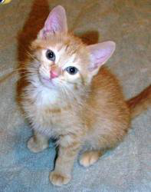

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


### What Is Machine Learning?

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

### How Our Image Recognizer Works

### What Our Image Recognizer Learned

### Image Recognizers Can Tackle Non-Image Tasks

### Jargon Recap

## Deep Learning Is Not Just for Image Classification

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.217607,2.354132,00:03


epoch,train_loss,valid_loss,time
0,1.696689,1.525391,00:04
1,1.524060,1.545286,00:04
2,1.416445,1.299091,00:04
3,1.312162,1.054816,00:04
4,1.194625,0.969643,00:04
5,1.088464,0.865210,00:04
6,0.995063,0.844281,00:04
7,0.919110,0.828939,00:04


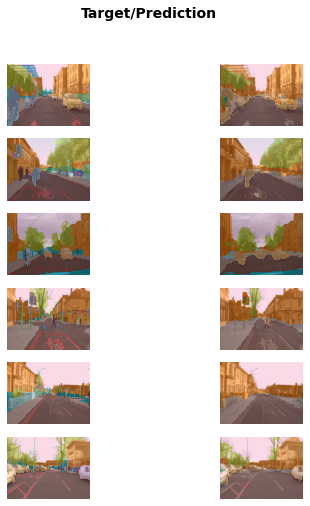

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.464594,0.401015,0.818600,12:07


epoch,train_loss,valid_loss,accuracy,time
0,0.298748,0.389092,0.802600,21:58
1,0.235956,0.202502,0.921360,22:02
2,0.192853,0.183920,0.929320,22:03
3,0.158265,0.198448,0.928840,22:01


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [ ]:
learn.predict("I really liked the first quarter of the movie. Then it became boring.")

('pos', tensor(1), tensor([0.0518, 0.9482]))

### Sidebar: The Order Matters

### End sidebar

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.378350,0.383831,0.822635,00:05
1,0.364284,0.348745,0.837991,00:05
2,0.358937,0.347329,0.837377,00:05


In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.516090,1.387014,00:00


epoch,train_loss,valid_loss,time
0,1.373904,1.328676,00:00
1,1.264893,1.153425,00:00
2,1.016844,0.862625,00:00
3,0.797781,0.733611,00:00
4,0.686553,0.704197,00:00
5,0.646212,0.695802,00:00
6,0.620920,0.691812,00:00
7,0.605554,0.690122,00:00
8,0.611145,0.689534,00:00
9,0.608098,0.689415,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,26.0,86.0,4.0,4.215118
1,32.0,42.0,4.0,3.939544
2,36.0,76.0,4.0,3.995362
3,36.0,83.0,4.5,4.479964
4,65.0,83.0,5.0,4.274940
5,99.0,94.0,4.0,3.727095
6,21.0,99.0,3.0,3.581341
7,73.0,19.0,2.0,2.630225
8,3.0,66.0,5.0,4.038328


### Sidebar: Datasets: Food for Models

### End sidebar

## Validation Sets and Test Sets

### Use Judgment in Defining Test Sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. Do you need these for deep learning?
   - Lots of math T / F
   - Lots of data T / F
   - Lots of expensive computers T / F
   - A PhD T / F

  > A lot of people assume that you need all kinds of hard-to-find stuff to get great results with deep learning, but as you'll see in this book, those people are wrong.
   
1. Name five areas where deep learning is now the best in the world.
> - Natural language processing (NLP):: Answering questions; speech recognition; summarizing documents; classifying documents; finding names, dates, etc. in documents; searching for articles mentioning a concept
  - Computer vision:: Satellite and drone imagery interpretation (e.g., for disaster resilience); face recognition; image captioning; reading traffic signs; locating pedestrians and vehicles in autonomous vehicles
  - Medicine:: Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy
  - Biology:: Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions
  - Image generation:: Colorizing images; increasing image resolution; removing noise from images; converting images to art in the style of famous artists
  - Recommendation systems:: Web search; product recommendations; home page layout
  - Playing games:: Chess, Go, most Atari video games, and many real-time strategy games
  - Robotics:: Handling objects that are challenging to locate (e.g., transparent, shiny, lacking texture) or hard to pick up
  - Other applications:: Financial and logistical forecasting, text to speech, and much more...

1. What was the name of the first device that was based on the principle of the artificial neuron?
> Mark I Perceptron.

1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
> 1. A set of *processing units*
  1. A *state of activation*
  1. An *output function* for each unit 
  1. A *pattern of connectivity* among units 
  1. A *propagation rule* for propagating patterns of activities through the network of connectivities 
  1. An *activation rule* for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit
  1. A *learning rule* whereby patterns of connectivity are modified by experience 
  1. An *environment* within which the system must operate

1. What were the two theoretical misunderstandings that held back the field of neural networks?
> * An MIT professor named Marvin Minsky (who was a grade behind Rosenblatt at the same high school!), along with Seymour Papert, wrote a book called Perceptrons (MIT Press), about Rosenblatt's invention. They showed that a single layer of these devices was unable to learn some simple but critical mathematical functions (such as XOR). In the same book, they also showed that using multiple layers of the devices would allow these limitations to be addressed. Unfortunately, only the first of these insights was widely recognized. As a result, the global academic community nearly entirely gave up on neural networks for the next two decades.
  * In the 1980's most models were built with a second layer of neurons, thus avoiding the problem that had been identified by Minsky and Papert (this was their "pattern of connectivity among units," to use the framework above). And indeed, neural networks were widely used during the '80s and '90s for real, practical projects. However, again a misunderstanding of the theoretical issues held back the field. In theory, adding just one extra layer of neurons was enough to allow any mathematical function to be approximated with these neural networks, but in practice such networks were often too big and too slow to be useful.

1. What is a GPU?  
> Also known as a graphics card. A special kind of processor in your computer that can handle thousands of single tasks at the same time, especially designed for displaying 3D environments on a computer for playing games. These same basic tasks are very similar to what neural networks do, such that GPUs can run neural networks hundreds of times faster than regular CPUs. All modern computers contain a GPU, but few contain the right kind of GPU necessary for deep learning.

1. Open a notebook and execute a cell containing: `1+1`. What happens?  
> The cell prints out the value returned by the last executed line of code, it is `2`.

1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
1. Complete the Jupyter Notebook online appendix.
1. Why is it hard to use a traditional computer program to recognize images in a photo?  
> Because there is no a general algorithm we can use to figure out the patterns that form the images we are trying to recoginize. The distribution of pixels are completly different in each photo, so this task is not generalizable.  
It's not too hard to imagine what the model might look like for a checkers program. There might be a range of checkers strategies encoded, and some kind of search mechanism, and then the weights could vary how strategies are selected, what parts of the board are focused on during a search, and so forth. But it's not at all obvious what the model might look like for an image recognition program, or for understanding text, or for many other interesting problems we might imagine.

1. What did Samuel mean by "weight assignment"?
> Weights are just variables, and a weight assignment is a particular choice of values for those variables. The program's inputs are values that it processes in order to produce its results—for instance, taking image pixels as inputs, and returning the classification "dog" as a result. The program's weight assignments are other values that define how the program will operate.

1. What term do we normally use in deep learning for what Samuel called "weights"?  
> Parameters.

1. Draw a picture that summarizes Samuel's view of a machine learning model.
1. Why is it hard to understand why a deep learning model makes a particular prediction?  
> Because when we use a model to predict some value or classify an input, internally it performs a lot of simple operations usign the current weights associated with the model. It would be extremely tricky work to check those operations one by one trying to find out why the model is outputting a value.

1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
> Universal approximation theorem.

1. What do you need in order to train a model?
> An architecture, input data, a loss function and an optimizer.

1. How could a feedback loop impact the rollout of a predictive policing model?
> * A predictive policing model is created based on where arrests have been made in the past. In practice, this is not actually predicting crime, but rather predicting arrests, and is therefore partially simply reflecting biases in existing policing processes.
  * Law enforcement officers then might use that model to decide where to focus their police activity, resulting in increased arrests in those areas.
  * Data on these additional arrests would then be fed back in to retrain future versions of the model.

1. Do we always have to use 224×224-pixel images with the cat recognition model?
> Why 224 pixels? This is the standard size for historical reasons (old pretrained models require this size exactly), but you can pass pretty much anything. If you increase the size, you'll often get a model with better results (since it will be able to focus on more details), but at the price of speed and memory consumption; the opposite is true if you decrease the size.

1. What is the difference between classification and regression?
> Regression is the prediction of a numeric quantity, classification consist in associating a label (class) to the input data.

1. What is a validation set? What is a test set? Why do we need them?
> * When you train a model, you must always have both a training set and a validation set, and must measure the accuracy of your model only on the validation set. If you train for too long, with not enough data, you will see the accuracy of your model start to get worse; this is called overfitting.
> * We, as modelers, are evaluating the model by looking at predictions on the validation data when we decide to explore new hyperparameter values! So subsequent versions of the model are, indirectly, shaped by us having seen the validation data. Just as the automatic training process is in danger of overfitting the training data, we are in danger of overfitting the validation data through human trial and error and exploration.
The solution to this conundrum is to introduce another level of even more highly reserved data, the test set.

1. What will fastai do if you don't provide a validation set?
> fastai defaults valid_pct to 0.2, so even if you forget, fastai will create a validation set for you!

1. Can we always use a random sample for a validation set? Why or why not?
> No. To do a good job of defining a validation set (and possibly a test set), you will sometimes want to do more than just randomly grab a fraction of your original dataset. Remember: a key property of the validation and test sets is that they must be representative of the new data you will see in the future. This may sound like an impossible order! By definition, you haven’t seen this data yet. But you usually still do know some things.

1. What is overfitting? Provide an example.
> Even when your model has not fully memorized all your data, earlier on in training it may have memorized certain parts of it. As a result, the longer you train for, the better your accuracy will get on the training set; the validation set accuracy will also improve for a while, but eventually it will start getting worse as the model starts to memorize the training set, rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is overfitting.

1. What is a metric? How does it differ from "loss"?
> A metric is a function that measures the quality of the model's predictions using the validation set. It is defined for human consumption, so a good metric is one that is easy for you to understand, and that hews as closely as possible to what you want the model to do.

1. How can pretrained models help?
> You should nearly always use a pretrained model, because it means that your model, before you've even shown it any of your data, is already very capable. And, as you'll see, in a deep learning model many of these capabilities are things you'll need, almost regardless of the details of your project. For instance, parts of pretrained models will handle edge, gradient, and color detection, which are needed for many tasks.

1. What is the "head" of a model?
> The head of a model is the last layer, which is always specifically customized to the task.

1. What kinds of features do the early layers of a CNN find? How about the later layers?
> The early layers can indentify features like lines, corners or circles (simple patterns), while later layers uses the building blocks learned in the early layers to find complex components like faces, flowers or cars.

1. Are image models only useful for photos?
> No. An image recognizer can, as its name suggests, only recognize images, but a lot of things can be represented as images, which means that an image recogniser can learn to complete many tasks.

1. What is an "architecture"?
> The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to

1. What is segmentation?
> Classification of each pixel in an image.

1. What is `y_range` used for? When do we need it?
> Is a parameter used to limit the values predicted by a model. It is used in regression problems.

1. What are "hyperparameters"?
> Parameters about parameters, since they are the higher-level choices that govern the meaning of the weight parameters.

1. What's the best way to avoid failures when using AI in an organization?
> ...A third party might not understand your requirements accurately, or their incentives might even encourage them to misunderstand them. A good test set can greatly mitigate these risks and let you evaluate whether their work solves your actual problem.

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
> The main difference between CPU and GPU architecture is that a CPU is designed to handle a wide-range of tasks quickly (as measured by CPU clock speed), but are limited in the concurrency of tasks that can be running. A GPU is designed to quickly render high-resolution images and video concurrently.  
Because GPUs can perform parallel operations on multiple sets of data, they are also commonly used for non-graphical tasks such as machine learning and scientific computation. Designed with thousands of processor cores running simultaneously, GPUs enable massive parallelism where each core is focused on making efficient calculations.  
GPUs are optimized for training artificial intelligence and deep learning models as they can process multiple computations simultaneously.
They have a large number of cores, which allows for better computation of multiple parallel processes. Additionally, computations in deep learning need to handle huge amounts of data — this makes a GPU’s memory bandwidth most suitable.

1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.
>